C:\Busisiwe\LENOVO_L14\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.2727 - loss: 1.5914 - val_accuracy: 0.5352 - val_loss: 1.1930
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5402 - loss: 1.1832 - val_accuracy: 0.6319 - val_loss: 1.0008
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5914 - loss: 1.0316 - val_accuracy: 0.6736 - val_loss: 0.9204
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6059 - loss: 0.9904 - val_accuracy: 0.7128 - val_loss: 0.8801
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6609 - loss: 0.8942 - val_accuracy: 0.7363 - val_loss: 0.8557
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6572 - loss: 0.9375 - val_accuracy: 0.7520 - val_loss: 0.8413
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6626 - loss: 0.9493 - val_accuracy: 0.7572 - val_loss: 0.8281
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7179 - loss: 0.8038 - val_accuracy: 0.7833 - val_loss

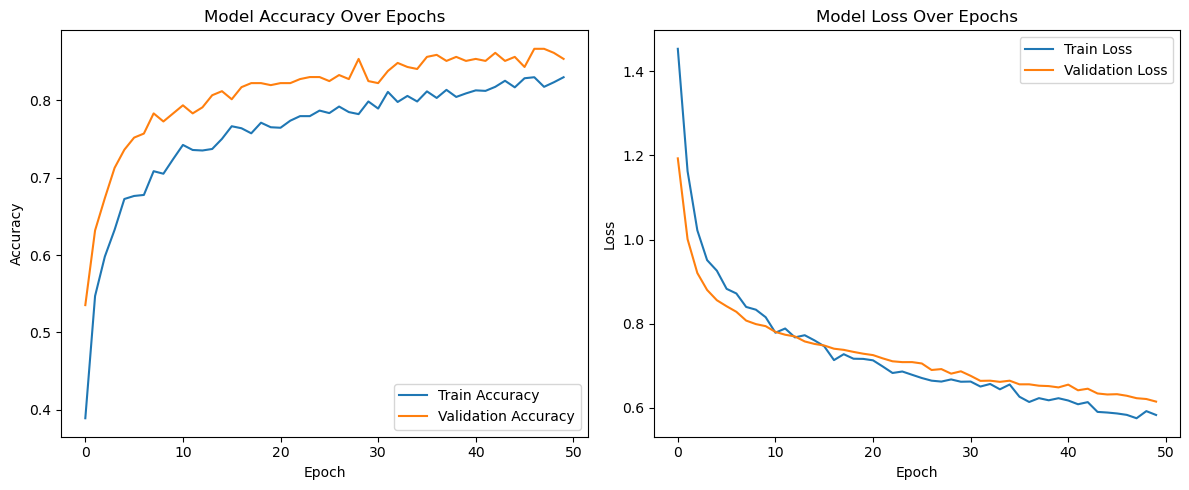

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load Data
data = pd.read_csv(r"C:\Users\LENOV0 L14\Pictures\Student_performance_data .csv")

# Drop StudentID as it's not needed
data.drop(columns=['StudentID'], inplace=True)

# Check for missing values
if data.isnull().sum().sum() != 0:
    data.fillna(method='ffill', inplace=True)  # Forward fill as a simple strategy

# Split features and target
X = data.drop(columns=['GradeClass'])
y = data['GradeClass']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert target to categorical (One-Hot Encoding)
y_train_cat = tf.keras.utils.to_categorical(y_train)
y_test_cat = tf.keras.utils.to_categorical(y_test)

# Build Deep Learning Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(5, activation='softmax')  # 5 classes: A, B, C, D, F
])

# Compile Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train Model
history = model.fit(X_train_scaled, y_train_cat, 
                    epochs=50, 
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

# Evaluate Model
loss, accuracy = model.evaluate(X_test_scaled, y_test_cat)
print(f"\nDeep Learning Model Accuracy on Test Set: {accuracy*100:.2f}%")

# Plot Training History
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
